# Convolutional Neural Networks in Python with Keras 

In this project, we will implement Convolutional Neural Networks (CNNs) in Python with Keras, and overcome overfitting with dropout.

We have already heard of image or facial recognition or self-driving cars. These are real-life implementations of Convolutional Neural Networks (CNNs). In this project, we have discussed and implemented  a deep, feed-forward convolutional neural network using Tenssorflow and Keras and also demonstrated how to overcome overfitting with the "dropout regularization" technique.

More specifically, we will discuss and demonstrate the following points:

1. We will discuss the working principles of Convolutional Neural Networks. 

2. Then, we will study the characteristics of the dataset on which we will work. We will use Python and its libraries to load, explore and analyze the data.

3. Then we will carry out the necessary preprocessing of the data. We will resize, rescale, convert the  labels into one-hot encoding vectors and split the data into a training and a validation set.

4. We will construct the convolutional neural network model, compile, train and evaluate it by visualizing the accuracy and loss plots for the training and validation phases.
   
5. Then, we will detecet overfitting in the model and get rid of the overfitting by using "dropout regularization" technique. We will retrain our model using dropout regularization and re-evaluate its performance in terms of the loss and accuracy values for the training and the validation phases. 

6. Next, we will make predictions on the test data, convert the probabilities into class labels and plot few test samples
   that our model correctly classified and some which it misclassified.
      
7. Finally, we will visualize the classification report of the model to get a deeper insight of its classification performance. 

## Convolutional Neural Networks 

A specific kind of a deep neural network is the convolutional network, which is commonly referred to as CNN or ConvNet. It's a deep, feed-forward artificial neural network. CNNs are inspired by the biological visual cortex. The cortex has small regions of cells that are sensitive to the specific areas of the visual field. This idea was expanded by a captivating experiment done by Hubel and Wiesel in 1962.

Convolutional neural networks have been one of the most influential innovations in the field of computer vision. These neural networks have proven to be successful in many different real-life case studies and applications, like:

    * Image classification, object detection, segmentation, face recognition;
    * Self driving cars that leverage CNN-based vision systems;
    * Classification of crystal structure using a convolutional neural network;

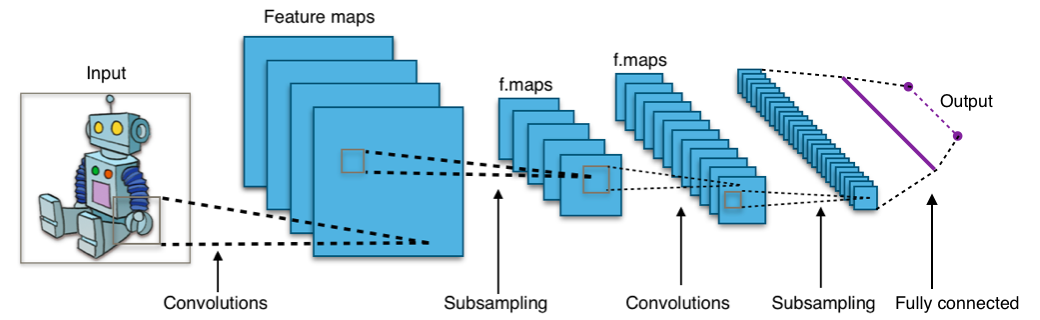

In [1]:
from IPython.display import Image
Image(filename='CNN.png')


1. The convolution layer computes the output of neurons that are connected to local regions or receptive fields in the input, each computing a dot product between their weights and a small receptive field to which they are connected to in the input volume. Each computation leads to extraction of a feature map from the input image. In other words, we have an image represented as a 5x5 matrix of pixels, and we take a 3x3 matrix and slide that 3x3 window or kernel around the image. At each position of that matrix, we multiply the values of our 3x3 window by the values in the image that are currently being covered by the window. As a result, we will get a single number that represents all the values in that window of the images. We use this layer for filtering: as the window moves over the image, we check for patterns in that section of the image. 

2. The objective of subsampling is to get an input representation by reducing its dimensions, which helps in reducing overfitting of the model. One of the techniques of subsampling is max-pooling. With this technique, we select the highest pixel value from a region. In other words, max-pooling takes the largest value from the window of the image currently covered by the kernel. For example, we can have a max-pooling layer of size 2 x 2 that will select the maximum pixel intensity value from 2 x 2 region. 

3. The objective of the fully connected layer is to flatten the high-level features that are gathered by convolutional layers and then combine all the features. The output of this layer is passed onto the output layer where we use a softmax classifier or a sigmoid to predict the input class label.

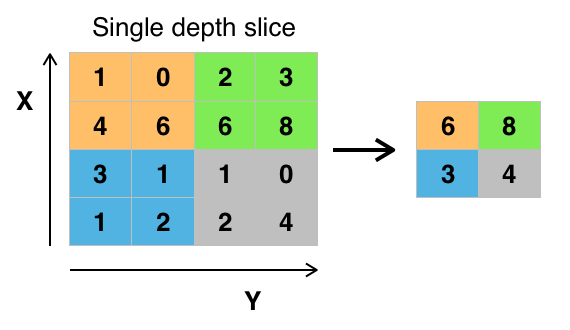

In [2]:
from IPython.display import Image
Image(filename='MAX_POOLING.png')

## The Fashion MNIST Data Set 

The Fashion-MNIST dataset is a dataset of 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images.(We will double check this later when we will load the data into our workspace.)

Fashion-MNIST is similar to the MNIST dataset used to classify handwritten digits. That means that the image dimensions, training and test splits are similar to the MNIST dataset. 

## Load the Data 

Keras comes with a library called datasets, which we will use to load our dataset. The train and test images along with the labels are loaded and stored in variables train_X, train_Y, test_X, test_Y, respectively.

In [3]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

Using TensorFlow backend.


## Analyze the Data  

We now analyze how images in the dataset look like. We will identify the size of the images, and then rescale the image pixels and resize the images.

In [4]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


From the above output, we see that the training data has a shape of 60000 x 28 x 28 implying that there are 60,000 training samples each of 28 x 28 dimension. Similarly, the test data has a shape of 10000 x 28 x 28 with 10,000 testing samples.

In [5]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


There's also a total of ten output classes; the class label values lie in the range 0 to 9.

We also take a look at some of the images in the dataset:

Text(0.5, 1.0, 'Ground Truth : 9')

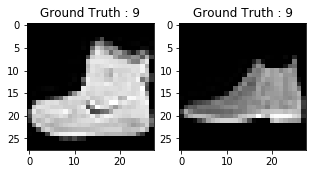

In [6]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

The figures look like that of an ankle boot, and this class is assigned a class label of 9. There are 7,000 ankle boot images with all having class label of 9.

## Data Preprocessing 

The images are grayscale images and have pixel values lying between 0 to 255. Also, each image of 28 X 28 dimension. We need to preprocess the data before we feed it into our network. 

1. As a first step, we convert each 28 x 28 image of the training and test set into a matrix of size 28 x 28 x 1. This is then  fed into the network.

In [7]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

2. The current format of the data is int8 format. Before we feed it into the network, we need to convert its type to float32, and we also have to rescale the pixel values in range 0 - 1.

In [8]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

3. Now, we convert the class labels into a one-hot encoding vector.

In one-hot encoding, we convert categorical data into a vector of numbers. The reason why we convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. We generate one Boolean column for each category or class. Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding.

For our problem at hand, the output of one hot encoding will be a row vector, and for each image, it will have a dimension of 1 x 10. The vector consists of all zeros except for the class that it represents, and for that, it is 1. For example, the ankle boot image that we plotted above has a label of 9, so for all the ankle boot images, the one hot encoding vector would be [0 0 0 0 0 0 0 0 0 1].

We convert the training and testing labels into one-hot encoding vectors:

In [9]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot  = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


4. In this final step of preprocessing, we split the training dataset into training and validation sets. In this case, we will train the model on 80\% of the original training dataset, and validate it on 20\% of the remaining training data. The validation will allow us to understand the behavior of the model during its training phase. 

In [10]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot,test_size=0.2, random_state=13)

Finally, we check the shape of training and validation set.

In [11]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

## The Network 

We have used three convolutional layers:

1. The first layer has 32-3 x 3 filters,
2. The second layer has 64-3 x 3 filters and
3. The third layer has 128-3 x 3 filters.
4. In addition, we have used three max-pooling layers each of size 2 x 2.

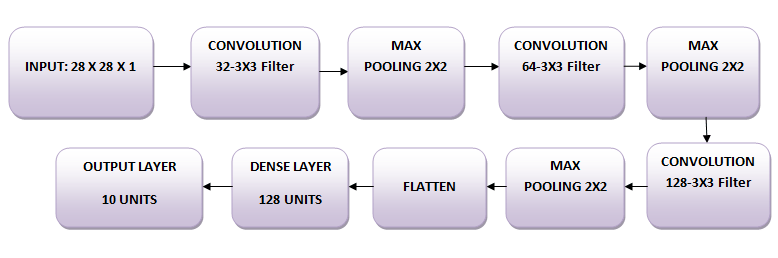

In [12]:
from IPython.display import Image
Image(filename='Model_Architecture.png')

## Model the Data  

First, let's import all the necessary modules required to train the model.

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model


from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.utils import plot_model

#from tensorflow.keras import backend as k

#import keras
#from keras.models import Sequential,Input,Model
#from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU

We have used a batch size of 64. A higher batch size of 128 or 256 is preferable but higher batch size may cause memory-related issues. We have trained the model over 20 epochs. 

In [14]:
batch_size = 64
epochs = 20
num_classes = 10

## Neural Network Architecture 

We first add a first convolutional layer with Conv2D()in Keras. We use this function because we're working with 2D images! Next, we add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries. Since we have ten different classes, we will need a non-linear decision boundary that could separate these ten classes which are not linearly separable.

More specifically, we add Leaky ReLUs because they attempt to fix the problem of dying Rectified Linear Units (ReLUs). The ReLU function allows the activation to be thresholded at zero. However, during the training, ReLU units can "die". This can happen when a large gradient flows through a ReLU neuron: it can cause the weights to update in such a way that the neuron will never activate on any data point again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. Leaky ReLUs attempt to solve this: the function will not be zero but will instead have a small negative slope.

Next, we add the max-pooling layer with MaxPooling2D(). The last layer is a Dense layer that has a softmax activation function with 10 units, used for this multi-class classification problem.

In [15]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

## Compile the Model 

After the model is constructed, we compile it using the Adam optimizer. Additionally, we specify the "loss" type which is "categorical cross entropy" which is used for multi-class classification Lastly, we specify the metrics as "accuracy" for analying the model performance.

In [16]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

Let's visualize the layers that we have created in the above step by using the summary function. This will show some parameters (weights and biases) in each layer and also the total parameters in our model.

In [17]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [18]:
plot_model(fashion_model, to_file='cnn-network.png', show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


## Train the Model 

Finally we train the model with Keras' fit() function. The model was trained for 20 epochs. The fit() function returns a "history object" that allows us to plot the accuracy and loss functions for the training and the validation phase. This helps us to analyze the model performance.

In [38]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 84s 113ms/step - loss: 0.4646 - accuracy: 0.8320 - val_loss: 0.3406 - val_accuracy: 0.8798
Epoch 2/20
750/750 [==============================] - 76s 101ms/step - loss: 0.2870 - accuracy: 0.8963 - val_loss: 0.3040 - val_accuracy: 0.8907
Epoch 3/20
750/750 [==============================] - 76s 102ms/step - loss: 0.2416 - accuracy: 0.9107 - val_loss: 0.2532 - val_accuracy: 0.9063
Epoch 4/20
750/750 [==============================] - 76s 102ms/step - loss: 0.2090 - accuracy: 0.9233 - val_loss: 0.2352 - val_accuracy: 0.9156
Epoch 5/20
750/750 [==============================] - 74s 99ms/step - loss: 0.1846 - accuracy: 0.9319 - val_loss: 0.2294 - val_accuracy: 0.9171
Epoch 6/20
750/750 [==============================] - 72s 95ms/step - loss: 0.1602 - accuracy: 0.9401 - val_loss: 0.2387 - val_accuracy: 0.9150
Epoch 7/20
750/750 [==============================] - 77s 102ms/step - loss: 0.1405 - accuracy: 0.9476 - val_loss: 0.2484 - val_accu

At the completion of the final epoch, the model exhibited training loss and accuracy values of 0.0292 and 0,9897 respectively. The validation loss and accuracy, however, were 0.5103 and 0.9132 repectively. 

Although the model performed well, it looked like the model was an overfitted model, since the validation loss was too high.  

But first, we evaluate the performance of the model on the test set before we come on to a conclusion.

## Model Evaluation of the Test Data Set 

In [22]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [23]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.534369170665741
Test accuracy: 0.909500002861023


The test accuracy looks impressive, but the test loss was too high. Again n indication of an overfitted model

We now plot the accuracy and loss plots between training and validation data:

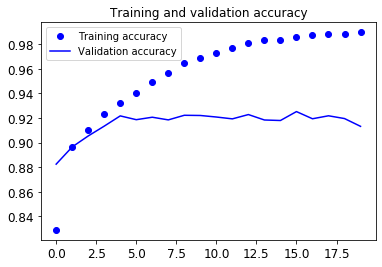

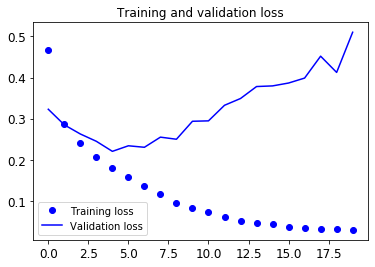

In [24]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

From the above two plots, we see that the validation accuracy almost became stagnant after 4-5 epochs and hardly increased after that. The training accuracy, however, monotonically increased with the number of epochs. 

The validation loss started increasing in a rapid rate after inital 5 epochs, while training loss consistently decreased with the number of epochs. This is a clear case of model overfitting. 

We now proceed to introduce "dropout regularization" in the model to eliminate the model overfitting. 

## Adding Dropout into the Network 

Dropout randomly turns off a fraction of neurons during the training process and in the process, reduces the chances of model overfitting. We introduced a dropout rate of 25% and then construct, compile and train the network again with a batch size of 64 and 2ith 20 epochs in the training phase. 

In [3]:
batch_size = 64
epochs = 20
num_classes = 10

In [26]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [27]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [28]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [29]:
plot_model(fashion_model, to_file='cnn-network_dropout1.png', show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [30]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 65s 86ms/step - loss: 0.5977 - accuracy: 0.7780 - val_loss: 0.3647 - val_accuracy: 0.8659
Epoch 2/20
750/750 [==============================] - 65s 87ms/step - loss: 0.3743 - accuracy: 0.8622 - val_loss: 0.3049 - val_accuracy: 0.8890
Epoch 3/20
750/750 [==============================] - 65s 86ms/step - loss: 0.3262 - accuracy: 0.8798 - val_loss: 0.2888 - val_accuracy: 0.8959
Epoch 4/20
750/750 [==============================] - 63s 84ms/step - loss: 0.3003 - accuracy: 0.8886 - val_loss: 0.2716 - val_accuracy: 0.8980
Epoch 5/20
750/750 [==============================] - 64s 85ms/step - loss: 0.2830 - accuracy: 0.8942 - val_loss: 0.2427 - val_accuracy: 0.9103
Epoch 6/20
750/750 [==============================] - 65s 87ms/step - loss: 0.2674 - accuracy: 0.9006 - val_loss: 0.2403 - val_accuracy: 0.9108
Epoch 7/20
750/750 [==============================] - 67s 89ms/step - loss: 0.2578 - accuracy: 0.9032 - val_loss: 0.2362 - val_accuracy:

## Model Evaluation on the Test Data Set 

Finally, we evaluate the regularized model on the test data too.

In [31]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 3s 10ms/step - loss: 0.2253 - accuracy: 0.9204


In [32]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22529900074005127
Test accuracy: 0.9204000234603882


It looks like adding dropout in the model has gone in our favor. Even though, the test accuracy did not improve significantly but there is a drastic reduction in the value of test loss. 

We now plot the accuracy and loss for the training and validation phase of the model. 

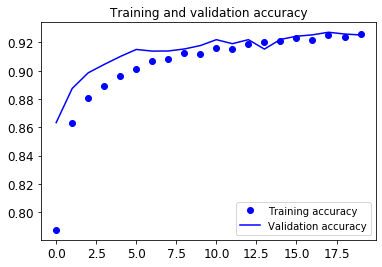

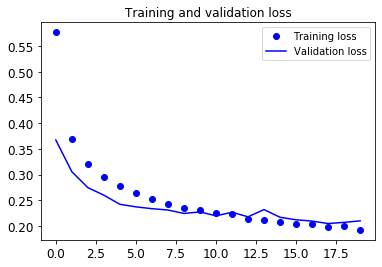

In [43]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Finally, you can see that the validation loss and validation accuracy both are in sync with the training loss and training accuracy. It is clear that the regularized model is no longer suffering from the problem of "model overfitting". 

## Predict Labels 

In [44]:
predicted_classes = fashion_model.predict(test_X)

Since the predictions will be in the form of floating point values, it will not be feasible to compare the predicted labels with true test labels. So, we round off the output that will convert the float values into an integer. We have used  np.argmax() to select the index number which has the highest value in a row.

For example, if the prediction for one test image is 0 1 0 0 0 0 0 0 0 0, the output for this image should be a class label 1.

In [45]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [46]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9170 correct labels


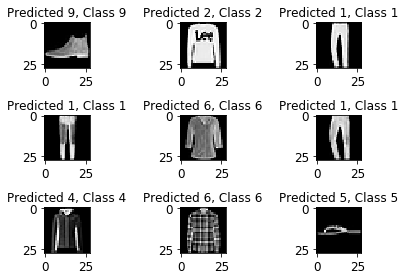

In [47]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 830 incorrect labels


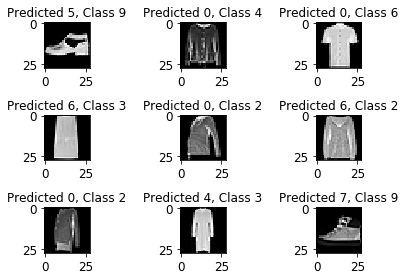

In [48]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

## Classification Report 

Classification report will help us in identifying the misclassified classes in more detail. You will be able to observe for which class the model performed bad out of the given ten classes.

In [49]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.91      0.83      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.89      0.86      0.88      1000
     Class 3       0.93      0.90      0.92      1000
     Class 4       0.89      0.85      0.87      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.79      0.74      0.77      1000
     Class 7       0.95      0.99      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

